# MXNet(Gluon) 入门基础
    MXNet有两种编码风格，Gluon 和 Module, Gluon 更适合入门，这里就从Gluon 开始学起，主要效仿官网相关教程进行渐进式学习。

## 3.概率统计基础
    很多时候机器学习的目标都是为了预测，在预测过程中需要很多的统计学的知识，这里就简单介绍下，机器学习过程中经常使用的一些统计学基础内容。
    可以使用概率分布来构造取样的多项式，这里只说明最简单的方法。确定好多项式分布的概率后，用取样函数就能进行按照概率的取样。
    注：这里概率总和必须为1，因为计算方式是从前面的概率开始计算器，如果前面总和已经为1，后面的概率再大，也不会命中。

In [1]:
import mxnet as mx
from mxnet import nd


[ 0.16666667  0.16666667  0.16666667  0.16666667  0.16666667  0.16666667]
<NDArray 6 @cpu(0)>

In [22]:
probabilities = nd.ones(6) / 6
probabilities
nd.sample_multinomial(probabilities)


[3]
<NDArray 1 @cpu(0)>

In [45]:
probabilities[0] = 0.5
probabilities[1] = 0.5
probabilities[2] = 50
probabilities[3] = 0
probabilities[4] = 0
probabilities[5] = 50
print(probabilities)
print(nd.sample_multinomial(probabilities,shape=(10,10)))


[  0.5   0.5  50.    0.    0.   50. ]
<NDArray 6 @cpu(0)>

[[0 1 0 1 0 0 0 1 0 0]
 [1 0 0 1 1 0 1 0 1 1]
 [0 0 1 0 1 0 0 1 1 1]
 [0 0 0 1 0 0 0 1 1 1]
 [0 0 0 1 1 0 1 1 0 0]
 [1 1 1 0 0 1 0 0 0 1]
 [0 1 0 1 1 0 1 1 1 1]
 [1 1 0 1 0 1 1 1 1 0]
 [1 0 0 1 0 1 1 0 0 0]
 [0 0 1 1 1 0 0 1 0 0]]
<NDArray 10x10 @cpu(0)>


    可以测试下取样出来的数据的相关概率

In [46]:
rolls = nd.sample_multinomial(probabilities, shape=(1000))

counts = nd.zeros((6,1000))
totals = nd.zeros(6)
for i, roll in enumerate(rolls):
    totals[int(roll.asscalar())] += 1
    counts[:, i] = totals
print('the probabilitiy is :',totals / 1000)

the probabilitiy is : 
[ 0.50400001  0.49599999  0.          0.          0.          0.        ]
<NDArray 6 @cpu(0)>


In [50]:
counts #概率变化过程，命中计数


[[   1.    2.    3. ...,  502.  503.  504.]
 [   0.    0.    0. ...,  496.  496.  496.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]]
<NDArray 6x1000 @cpu(0)>

In [51]:
x = nd.arange(1000).reshape((1,1000)) + 1
estimates = counts / x
print(estimates[:,0])
print(estimates[:,1])
print(estimates[:,100])
print(estimates[:,999])


[ 1.  0.  0.  0.  0.  0.]
<NDArray 6 @cpu(0)>

[ 1.  0.  0.  0.  0.  0.]
<NDArray 6 @cpu(0)>

[ 0.42574257  0.57425743  0.          0.          0.          0.        ]
<NDArray 6 @cpu(0)>

[ 0.50400001  0.49599999  0.          0.          0.          0.        ]
<NDArray 6 @cpu(0)>


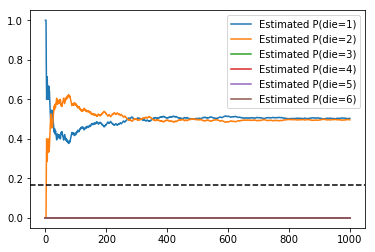

In [52]:
#引入作图类库，构建概率分布图
from matplotlib import pyplot as plt
plt.plot(estimates[0, :].asnumpy(), label="Estimated P(die=1)")
plt.plot(estimates[1, :].asnumpy(), label="Estimated P(die=2)")
plt.plot(estimates[2, :].asnumpy(), label="Estimated P(die=3)")
plt.plot(estimates[3, :].asnumpy(), label="Estimated P(die=4)")
plt.plot(estimates[4, :].asnumpy(), label="Estimated P(die=5)")
plt.plot(estimates[5, :].asnumpy(), label="Estimated P(die=6)")
plt.axhline(y=0.16666, color='black', linestyle='dashed')
plt.legend()
plt.show()

to be continued http://gluon.mxnet.io/chapter01_crashcourse/probability.html